In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16

In [4]:
dataset_dir = "./caltech-101-img"
dataset_datagen = ImageDataGenerator(rescale=1.0/255)

dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64,64),
    batch_size=2000,
    class_mode='categorical'
    
)

Found 9144 images belonging to 102 classes.


In [5]:
x_train, y_train = dataset_generator[0]
x_test, y_test = dataset_generator[1]

In [6]:
weights_path = "./vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights= weights_path, include_top=False, input_shape=(64,64,3))

In [7]:
for layer in base_model.layers:
    layer.trainable = False

In [8]:
x = Flatten()(base_model.output)
x = Dense(64, activation = 'relu')(x)
predictions  = Dense(102, activation = 'softmax')(x)

model = Model(inputs = base_model.input, outputs = predictions)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 14,852,454 (56.66 MB)

 Trainable params: 137,766 (538.15 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [9]:
model.fit(x_train, y_train, batch_size= 64, epochs = 10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.1429 - loss: 4.2577 - val_accuracy: 0.2710 - val_loss: 3.4974
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.2942 - loss: 3.2794 - val_accuracy: 0.3315 - val_loss: 3.0934
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.3929 - loss: 2.8077 - val_accuracy: 0.3895 - val_loss: 2.8032
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.4697 - loss: 2.4314 - val_accuracy: 0.4355 - val_loss: 2.5701
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.5286 - loss: 2.1325 - val_accuracy: 0.4830 - val_loss: 2.3736
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.6011 - loss: 1.8443 - val_accuracy: 0.5165 - val_loss: 2.2540
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.6288 - loss: 1.6936 - val_accuracy: 0.5265 - val_loss: 2.1209
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.6779 - loss: 1.4828 - val_accuracy: 0.5350 - val_loss:

In [10]:
for layer in base_model.layers[len(base_model.layers) - 2:]:
   layer.trainable = True
x = Flatten()(base_model.output)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(102, activation = 'softmax')(x)

model = Model(inputs= base_model.input, outputs = predictions)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size = 128, epochs = 10, validation_data=(x_test, y_test))

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.2078 - loss: 3.8724 - val_accuracy: 0.4775 - val_loss: 2.4093
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.5653 - loss: 1.8726 - val_accuracy: 0.5425 - val_loss: 1.9676
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.7139 - loss: 1.0879 - val_accuracy: 0.6020 - val_loss: 1.6706
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.8278 - loss: 0.6486 - val_accuracy: 0.6305 - val_loss: 1.5951
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.9124 - loss: 0.3318 - val_accuracy: 0.6345 - val_loss: 1.5845
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.9557 - loss: 0.1903 - val_accuracy: 0.6300 - val_loss: 1.6202
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9751 - loss: 0.1059 - val_accuracy: 0.6590 - val_loss: 1.5943
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.9885 - loss: 0.0601 - val_accuracy: 0.6345 - val_loss:

In [11]:
predicted_value = model.predict(x_test)
labels = list(dataset_generator.class_indices.keys())

63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 305ms/step


Preditcted:  Faces
Actual:  Faces


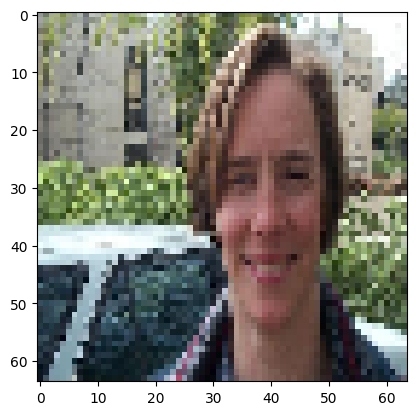

In [12]:
n = 991

plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])

In [ ]:
'''
Here’s a detailed breakdown of the code, its significance, and potential viva questions and answers for each section.

---

## **1. Imports and Setup**
```python
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
```

### Explanation:
- **`import tensorflow as tf`**: Imports TensorFlow, a popular deep learning library.
- **`import numpy as np`**: Imports NumPy for array manipulation.
- **`import matplotlib.pyplot as plt`**: Imports Matplotlib for data visualization.
- **`from tensorflow.keras.preprocessing.image import ImageDataGenerator`**: Imports `ImageDataGenerator`, used for generating batches of image data with real-time data augmentation.
- **`from tensorflow.keras.layers import Dense, Dropout, Flatten`**: Imports `Dense`, `Dropout`, and `Flatten` layers from Keras.
- **`from tensorflow.keras.models import Model`**: Imports `Model` for defining the neural network model.
- **`from tensorflow.keras.applications import VGG16`**: Imports VGG16, a pretrained model for image classification.

### Viva Questions:
1. **Why is `ImageDataGenerator` used here?**
   - **Answer**: `ImageDataGenerator` is used for loading images in batches and performing data preprocessing, such as scaling, to prepare the dataset for training.

2. **What does `VGG16` refer to?**
   - **Answer**: `VGG16` is a pretrained deep learning model that has been trained on the ImageNet dataset, useful for transfer learning on similar tasks.

---

## **2. Setting Up Data Generators**
```python
dataset_dir = "./caltech-101-img"
dataset_datagen = ImageDataGenerator(rescale=1.0/255)

dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64,64),
    batch_size=2000,
    class_mode='categorical'
)
```

### Explanation:
- **`dataset_dir = "./caltech-101-img"`**: Specifies the directory path where images are stored.
- **`ImageDataGenerator(rescale=1.0/255)`**: Scales image pixel values to the range [0,1] by dividing by 255 (the maximum pixel value).
- **`flow_from_directory(...)`**: Loads the dataset from the specified directory, resizes images to 64x64 pixels, sets the batch size to 2000, and specifies a categorical class mode (one-hot encoding for multiple classes).

### Viva Questions:
1. **Why do we use `rescale=1.0/255`?**
   - **Answer**: This scales the pixel values to between 0 and 1, making the data suitable for training neural networks.

2. **What does `class_mode='categorical'` do?**
   - **Answer**: It indicates that the labels should be returned as one-hot encoded vectors suitable for multi-class classification.

---

## **3. Splitting Data into Training and Testing Sets**
```python
x_train, y_train = dataset_generator[0]
x_test, y_test = dataset_generator[1]
```

### Explanation:
- **`dataset_generator[0]`**: Loads the first batch of images and labels from the generator, assigned as training data.
- **`dataset_generator[1]`**: Loads the second batch of images and labels, assigned as testing data.

### Viva Questions:
1. **How is data splitting done here?**
   - **Answer**: The code loads data from the generator directly; the first batch is used for training, and the second batch for testing.

2. **What are `x_train`, `y_train`, `x_test`, and `y_test`?**
   - **Answer**: These variables hold the training and testing data and labels respectively.

---

## **4. Loading and Configuring VGG16 Model**
```python
weights_path = "./vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights= weights_path, include_top=False, input_shape=(64,64,3))
for layer in base_model.layers:
    layer.trainable = False
```

### Explanation:
- **`weights_path`**: Specifies the path to VGG16 pretrained weights.
- **`VGG16(weights=weights_path, include_top=False, input_shape=(64,64,3))`**: Loads the VGG16 model without the top layers, with input size 64x64 and 3 color channels.
- **`for layer in base_model.layers: layer.trainable = False`**: Freezes the weights of VGG16 layers to prevent updating during training.

### Viva Questions:
1. **Why set `include_top=False` in VGG16?**
   - **Answer**: To exclude the fully connected layers, allowing us to add custom layers for our specific classification task.

2. **Why are the `base_model` layers set to non-trainable?**
   - **Answer**: To retain the pretrained feature extraction without altering it, which saves time and computational resources.

---

## **5. Adding Custom Layers and Compiling the Model**
```python
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
```

### Explanation:
- **`Flatten()`**: Flattens the output from the base model into a 1D vector.
- **`Dense(64, activation='relu')`**: Adds a fully connected layer with 64 neurons and ReLU activation.
- **`Dense(102, activation='softmax')`**: Adds an output layer with 102 neurons (one for each class) and softmax activation for multi-class classification.
- **`Model(inputs=base_model.input, outputs=predictions)`**: Defines the final model with `base_model` as input and `predictions` as output.
- **`compile(...)`**: Configures the model for training with Adam optimizer, categorical cross-entropy loss, and accuracy metric.

### Viva Questions:
1. **What is the purpose of the `Flatten` layer?**
   - **Answer**: It converts the multi-dimensional output of VGG16 into a 1D vector, which is required by the dense layers.

2. **Why use `categorical_crossentropy` as the loss function?**
   - **Answer**: It is used for multi-class classification problems where the output layer uses softmax activation.

---

## **6. Initial Model Training**
```python
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))
```

### Explanation:
- **`fit(...)`**: Trains the model on `x_train` and `y_train` with batch size 64 for 10 epochs, and evaluates on `x_test` and `y_test`.

### Viva Questions:
1. **What does `batch_size` mean in model training?**
   - **Answer**: It determines the number of samples processed before updating the model's weights.

2. **Why use `epochs=10`?**
   - **Answer**: Training for 10 epochs allows the model multiple passes through the dataset to learn patterns.

---

## **7. Fine-Tuning the Model by Unfreezing Layers**
```python
for layer in base_model.layers[len(base_model.layers) - 2:]:
    layer.trainable = True
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(102, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
```

### Explanation:
- **`for layer in base_model.layers[len(base_model.layers) - 2:]`**: Unfreezes the last two layers of VGG16 for fine-tuning.
- **`Dropout(0.2)`**: Adds a dropout layer with a 20% rate to reduce overfitting.

### Viva Questions:
1. **Why add dropout in this layer?**
   - **Answer**: Dropout randomly disables a fraction of neurons to prevent overfitting during training.

2. **What is fine-tuning?**
   - **Answer**: Fine-tuning involves selectively unfreezing and retraining certain layers of a pretrained model for better adaptation to a new task.

---

## **8. Final Model Training**
```python
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))
```

### Explanation:
- **`fit(...)`**: Trains the fine-tuned model with a batch size of 128 for 10 more epochs.

### Viva Questions:
1. **Why might we increase the batch size in the second training?**
   - **Answer**: A larger batch size can speed up training and help stabilize gradients after the initial model has learned some features.

---

## **9. Making Predictions and Visualizing Results**
```python
predicted_value = model.predict(x_test)
labels = list(dataset_generator.class_indices.keys())
n = 991

plt.imshow(x_test[n])
print("Predicted: ", labels[np.argmax(predicted_value

[n])])
print("Actual: ", labels[np.argmax(y_test[n])])
```

### Explanation:
- **`model.predict(x_test)`**: Makes predictions on the test set.
- **`labels = list(dataset_generator.class_indices.keys())`**: Retrieves the class names.
- **`plt.imshow(x_test[n])`**: Displays the nth test image.
- **`print(...)`**: Shows the predicted and actual labels.

### Viva Questions:
1. **What does `np.argmax` do here?**
   - **Answer**: It retrieves the index of the maximum value in a prediction array, identifying the predicted class.
'''